In [1]:
import os
from os import path
from datetime import datetime
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib.ticker import MaxNLocator

plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
import seaborn as sns

In [4]:
filename = path.join('..', 'data', 'raw', 'BOLETIM_DIARIO_CORONAVIRUS_SAP.xlsx')

assert path.exists(filename), f"Caminho para o arquivo não existe:\n{filename}"

In [5]:
frame = pd.read_excel(filename,
                   index_col="DATA",
                   parse_dates=['DATA'],
                   engine='openpyxl')

In [6]:
frame['NOVOS_CASOS'] = frame['CONFIRMADOS'].diff(periods=1)
frame['RECUPERADOS_DIA'] = frame['RECUPERADOS'].diff(periods=1)
frame['DESCARTADOS_DIA'] = frame['DESCARTADOS'].diff(periods=1)

frame.head()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,NOVOS_CASOS,RECUPERADOS_DIA,DESCARTADOS_DIA
DATA,,,,,,,,,,,,
2020-07-03,690,263,105,1058,63,38,3,35,4,NaN,NaN,NaN
2020-07-04,709,251,109,1069,65,43,3,40,4,4.0,2.0,19.0
2020-07-05,711,252,110,1073,71,35,3,32,4,1.0,6.0,2.0
2020-07-06,722,293,121,1136,79,38,2,36,4,11.0,8.0,11.0
2020-07-07,794,264,126,1184,85,37,4,33,4,5.0,6.0,72.0


In [7]:
frame.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,NOVOS_CASOS,RECUPERADOS_DIA,DESCARTADOS_DIA
DATA,,,,,,,,,,,,
2021-04-04,8139,289,2711,11139,2082,565,23,542,64,17.0,13.0,140.0
2021-04-05,8139,350,2721,11210,2158,499,23,476,64,10.0,76.0,0.0
2021-04-06,8140,362,2737,11239,2232,440,23,417,65,16.0,74.0,1.0
2021-04-07,8193,375,2772,11340,2302,403,23,380,67,35.0,70.0,53.0
2021-04-08,8239,345,2821,11405,2361,392,25,367,68,49.0,59.0,46.0


In [8]:
frame['2021-03-23':]['NOVOS_CASOS'].sum()

768.0

In [9]:
df = frame.resample('W-MON').sum()

In [10]:
df.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,NOVOS_CASOS,RECUPERADOS_DIA,DESCARTADOS_DIA
DATA,,,,,,,,,,,,
2021-03-15,45097,1954,11810,58861,9640,1907,92,1815,263,192.0,112.0,287.0
2021-03-22,47815,2330,13622,63767,10632,2682,109,2573,308,287.0,166.0,453.0
2021-03-29,51503,3031,16260,70794,12030,3854,139,3717,376,441.0,237.0,749.0
2021-04-05,55781,2569,18457,76807,14116,3915,170,3745,426,227.0,333.0,382.0
2021-04-12,24572,1082,8330,33984,6895,1235,71,1164,200,100.0,203.0,100.0


In [11]:
import matplotlib.ticker as plticker



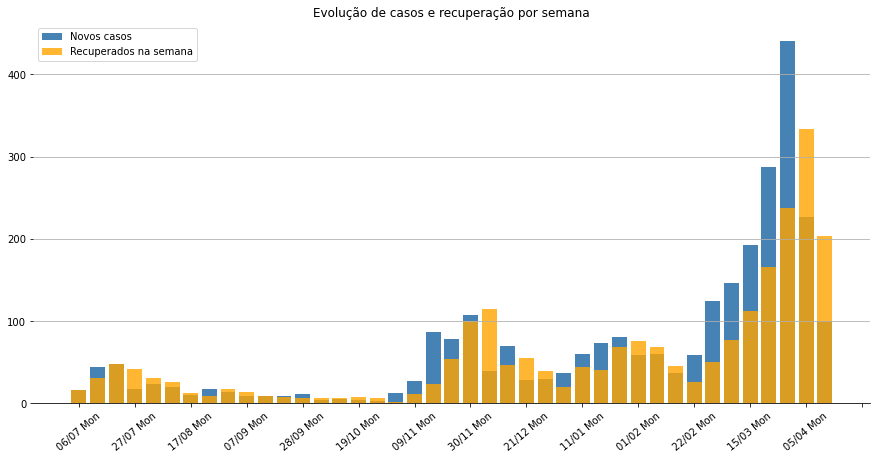

In [12]:
loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
# plt.bar(labels, df['DESCARTADOS_DIA'], color='green', alpha=0.8, label="Casos descartados na semana")
plt.bar(labels, df['NOVOS_CASOS'], color='steelblue', label='Novos casos')
plt.bar(labels, df['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados na semana')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)

In [13]:
today = datetime.now()

today.strftime("%d/%m/%y %a")

'08/04/21 Thu'

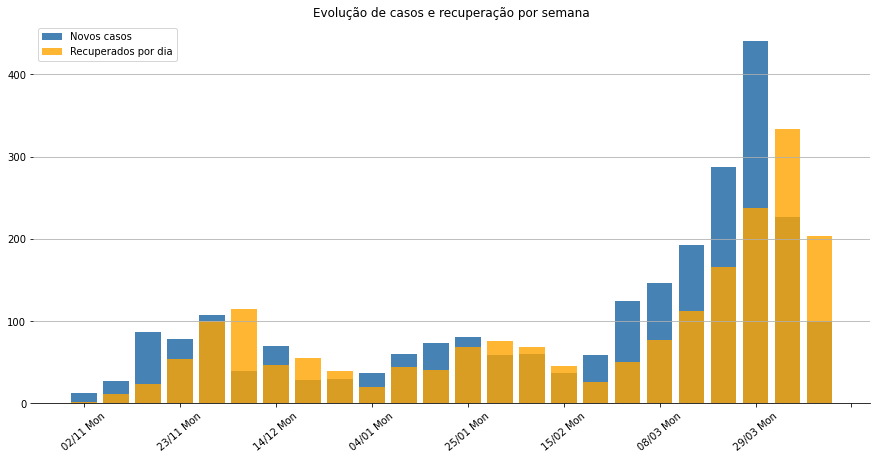

In [14]:
df2 = df['2020-11':]

loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df2.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
plt.bar(labels, df2['NOVOS_CASOS'], color='steelblue', label='Novos casos')
plt.bar(labels, df2['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados por dia')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)